In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import radialProfile
import glob
import cv2
from scipy.interpolate import griddata
import copy

#### 查看Deepfakes, Face2Face, FaceSwap, NeuralTextures数据集(c23)对应的功率谱图像

In [81]:
#real data
N = 88
epsilon = 1e-8
number_iter = 720 * 10
psd1D_total = np.zeros([number_iter, N])
y = []
error = []

psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)

cont = 0
rootdir = '/data/dataset/FF++_std_c23_300frames_withface/train/real'


for folder in list(os.listdir(rootdir)):
    cur_foldr = os.path.join(rootdir, folder)
    
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_foldr)):
        file_path = os.path.join(cur_foldr, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x] = np.std(psd1D_total[:,x])

y.append(copy.deepcopy(psd1D_org_mean))
error.append(copy.deepcopy(psd1D_org_std))
print('real Done')

pass
# fake

## DF
psd1D_total2 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean2 = np.zeros(N)
psd1D_org_std2 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c23_300frames_withface/train/fake/Deepfakes'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D_DF = radialProfile.azimuthalAverage(magnitude_spectrum)
        
        points = np.linspace(0, N, num=psd1D_DF.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D_DF, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total2[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total2[:,x])
    psd1D_org_std2[x] = np.std(psd1D_total2[:,x])

y.append(copy.deepcopy(psd1D_org_mean2))
error.append(copy.deepcopy(psd1D_org_std2))
print('fake DF Done')

pass

## NT
psd1D_total3 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean3 = np.zeros(N)
psd1D_org_std3 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c23_300frames_withface/train/fake/NeuralTextures'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total3[cont,:] = interpolated
        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean3[x] = np.mean(psd1D_total3[:,x])
    psd1D_org_std3[x] = np.std(psd1D_total3[:,x])

y.append(copy.deepcopy(psd1D_org_mean3))
error.append(copy.deepcopy(psd1D_org_std3))
print('Fake NT done')

pass

## FS
psd1D_total4 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean4 = np.zeros(N)
psd1D_org_std4 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c23_300frames_withface/train/fake/FaceSwap'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        
        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)

        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]
        
        psd1D_total4[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean4[x] = np.mean(psd1D_total4[:,x])
    psd1D_org_std4[x] = np.std(psd1D_total4[:,x])

y.append(copy.deepcopy(psd1D_org_mean4))
error.append(copy.deepcopy(psd1D_org_std4))
print('Fake FS done')

pass

## F2F
psd1D_total5 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean5 = np.zeros(N)
psd1D_org_std5 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c23_300frames_withface/train/fake/Face2Face'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)

        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total5[cont,:] = interpolated
        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean5[x] = np.mean(psd1D_total5[:,x])
    psd1D_org_std5[x] = np.std(psd1D_total5[:,x])

y.append(copy.deepcopy(psd1D_org_mean5))
error.append(copy.deepcopy(psd1D_org_std5))
print('Fake F2F done')

pass

real Done
fake DF Done
Fake NT done
Fake FS done
Fake F2F done


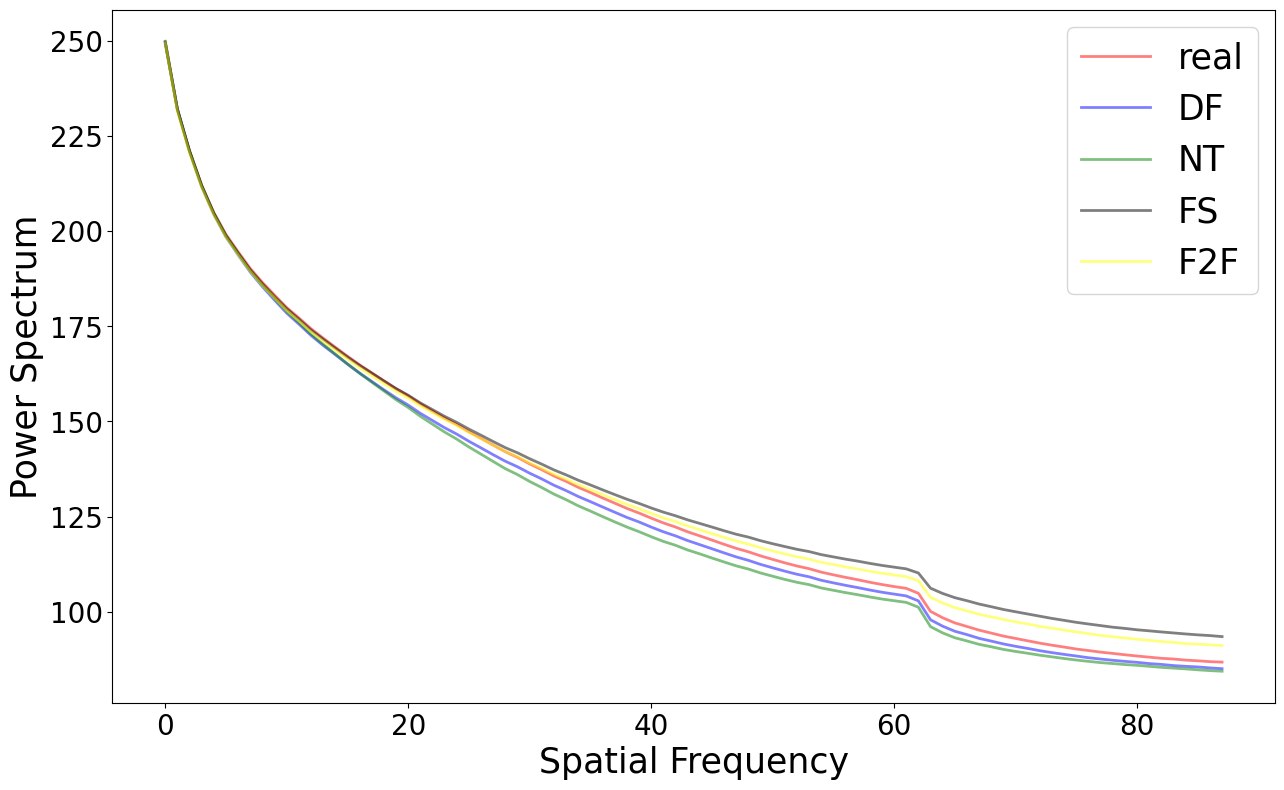

In [82]:
x = np.arange(0, N, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, y[0], alpha=0.5, color='red', label='real', linewidth =2.0)
# ax.fill_between(x, y[0] - error[0], y[0] + error[0], color='red', alpha=0.2)

ax.plot(x, y[1], alpha=0.5, color='blue', label='DF', linewidth = 2.0)
# ax.fill_between(x, y[1] - error[1], y[1] + error[1], color='blue', alpha=0.2)

ax.plot(x, y[2], alpha=0.5, color='green', label='NT', linewidth = 2.0)
# ax.fill_between(x, y[2] - error[2], y[2] + error[2], color='green', alpha=0.2)

ax.plot(x, y[3], alpha=0.5, color='black', label='FS', linewidth = 2.0)
# ax.fill_between(x, y[3] - error[3], y[3] + error[3], color='black', alpha=0.2)

ax.plot(x, y[4], alpha=0.5, color='yellow', label='F2F', linewidth = 2.0)
# ax.fill_between(x, y[4] - error[4], y[4] + error[4], color='yellow', alpha=0.2)


plt.xlabel('Spatial Frequency', fontsize=25)
plt.ylabel('Power Spectrum', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax.legend(loc='best', prop={'size': 25})

#### 查看Deepfakes, Face2Face, FaceSwap, NeuralTextures数据集(c40)对应的功率谱图像

In [83]:
#real data
N = 88
epsilon = 1e-8
number_iter = 140 * 10
psd1D_total = np.zeros([number_iter, N])
y = []
error = []

psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)

cont = 0
rootdir = '/data/dataset/FF++_std_c40_300frames_withface/valid/real'


for folder in list(os.listdir(rootdir)):
    cur_foldr = os.path.join(rootdir, folder)
    
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_foldr)):
        file_path = os.path.join(cur_foldr, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x] = np.std(psd1D_total[:,x])

y.append(copy.deepcopy(psd1D_org_mean))
error.append(copy.deepcopy(psd1D_org_std))
print('real Done')

pass
# fake

## DF
psd1D_total2 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean2 = np.zeros(N)
psd1D_org_std2 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c40_300frames_withface/valid/fake/Deepfakes'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D_DF = radialProfile.azimuthalAverage(magnitude_spectrum)
        
        points = np.linspace(0, N, num=psd1D_DF.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D_DF, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total2[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total2[:,x])
    psd1D_org_std2[x] = np.std(psd1D_total2[:,x])

y.append(copy.deepcopy(psd1D_org_mean2))
error.append(copy.deepcopy(psd1D_org_std2))
print('fake DF Done')

pass

## NT
psd1D_total3 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean3 = np.zeros(N)
psd1D_org_std3 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c40_300frames_withface/valid/fake/NeuralTextures'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)
        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total3[cont,:] = interpolated
        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean3[x] = np.mean(psd1D_total3[:,x])
    psd1D_org_std3[x] = np.std(psd1D_total3[:,x])

y.append(copy.deepcopy(psd1D_org_mean3))
error.append(copy.deepcopy(psd1D_org_std3))
print('Fake NT done')

pass

## FS
psd1D_total4 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean4 = np.zeros(N)
psd1D_org_std4 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c40_300frames_withface/valid/fake/FaceSwap'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        
        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)

        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]
        
        psd1D_total4[cont,:] = interpolated

        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean4[x] = np.mean(psd1D_total4[:,x])
    psd1D_org_std4[x] = np.std(psd1D_total4[:,x])

y.append(copy.deepcopy(psd1D_org_mean4))
error.append(copy.deepcopy(psd1D_org_std4))
print('Fake FS done')

pass

## F2F
psd1D_total5 = np.zeros([number_iter, N])
cont = 0
psd1D_org_mean5 = np.zeros(N)
psd1D_org_std5 = np.zeros(N)
fake_root_dir = '/data/dataset/FF++_std_c40_300frames_withface/valid/fake/Face2Face'
for folder in list(os.listdir(fake_root_dir)):
    cur_folder = os.path.join(fake_root_dir,folder)
    file_cnt = 0  #每个文件夹内去的图片数
    for file in list(os.listdir(cur_folder)):
        file_path = os.path.join(cur_folder, file)
        img = cv2.imread(file_path, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

        points = np.linspace(0, N, num=psd1D.size)
        xi = np.linspace(0, N, num=N)

        interpolated = griddata(points, psd1D, xi, method='cubic')
        # interpolated = (interpolated-np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated))
        # interpolated /= interpolated[0]

        psd1D_total5[cont,:] = interpolated
        cont += 1
        file_cnt += 1
        if file_cnt == 10:
            break
for x in range(N):
    psd1D_org_mean5[x] = np.mean(psd1D_total5[:,x])
    psd1D_org_std5[x] = np.std(psd1D_total5[:,x])

y.append(copy.deepcopy(psd1D_org_mean5))
error.append(copy.deepcopy(psd1D_org_std5))
print('Fake F2F done')

pass

real Done
fake DF Done
Fake NT done
Fake FS done
Fake F2F done


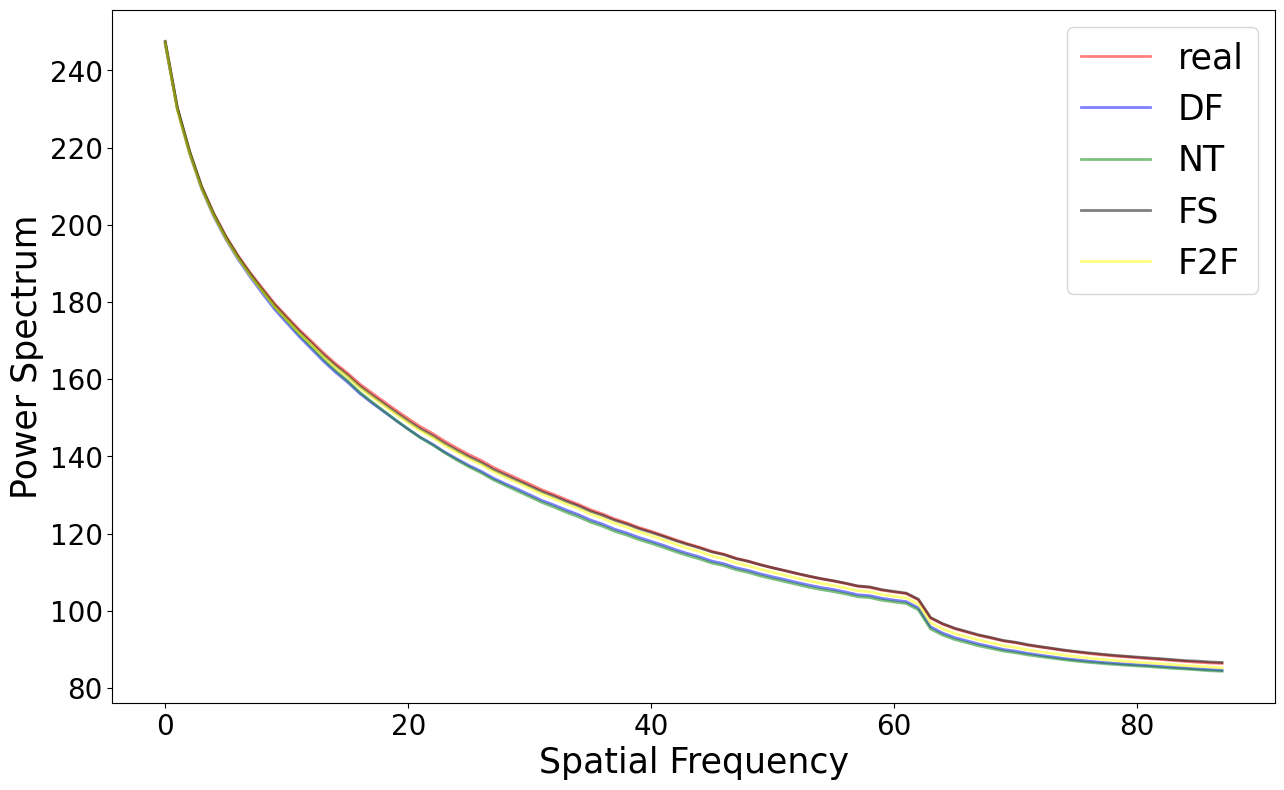

In [84]:
x = np.arange(0, N, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, y[0], alpha=0.5, color='red', label='real', linewidth =2.0)
# ax.fill_between(x, y[0] - error[0], y[0] + error[0], color='red', alpha=0.2)

ax.plot(x, y[1], alpha=0.5, color='blue', label='DF', linewidth = 2.0)
# ax.fill_between(x, psd1D_org_mean2 - psd1D_org_std2, psd1D_org_mean2 + psd1D_org_std2, color='blue', alpha=0.2)

ax.plot(x, y[2], alpha=0.5, color='green', label='NT', linewidth = 2.0)
# ax.fill_between(x, psd1D_org_mean3 - psd1D_org_std3, psd1D_org_mean3 + psd1D_org_std3, color='green', alpha=0.2)

ax.plot(x, y[3], alpha=0.5, color='black', label='FS', linewidth = 2.0)
# ax.fill_between(x, psd1D_org_mean4 - psd1D_org_std4, psd1D_org_mean4 + psd1D_org_std4, color='black', alpha=0.2)

ax.plot(x, y[4], alpha=0.5, color='yellow', label='F2F', linewidth = 2.0)
# ax.fill_between(x, psd1D_org_mean5 - psd1D_org_std5, psd1D_org_mean5 + psd1D_org_std5, color='yellow', alpha=0.2)

plt.xlabel('Spatial Frequency', fontsize=25)
plt.ylabel('Power Spectrum', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 25})